## Woo's Detection of Bubble and Undervalued Zones

#### Importing notebooks

In [1]:
%%capture
%run '01. Data Retrieval.ipynb'

#### Importing packages

In [2]:
from matplotlib.ticker import MultipleLocator

### 1. Calculation of Log Values

In [3]:
#init dataframe 'woo' that will contain all log values for bpi
#and search volume on 'btc usd'.
woo = pandas.DataFrame(index=data.index, columns=['bpi_log'])
#calculate log values for bitcoin price
woo.bpi_log = numpy.log(data.bitcoin_price)

#read search volumes from csv and put into dataframe 'google'
google = pandas.read_csv("../csv_data/btc_usd_google_trends.csv", ";")

#adjust dataframe
google['date'] = pandas.to_datetime(google['date'], format="%d.%m.%y")
google['search_volume_btc_usd'] = google['search_volume_btc_usd'].str.replace(',','.')
google['search_volume_btc_usd'] = google['search_volume_btc_usd'].\
apply(pandas.to_numeric)

google.set_index('date', inplace=True)

#calculate log values for search volume
google['search_volume_log'] = numpy.nan
google.search_volume_log = numpy.log(google.search_volume_btc_usd)

#join dataframes
woo = woo.join(google.search_volume_log)

#fill all NaN values with fill forward method.
#in other words: take value from Sunday and paste it into Monday, Tuesday,
#Wednesday, Thursday, Friday
#why: Google Trends gives weekly data only. This way daily data is approximated
woo.fillna(method='ffill', inplace=True)

#warning due as log(0) is not defines

/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


In [4]:
#output first 20 rows of dataframe. '-inf' stands for infinite is results of log(0).
woo.head(20)

,bpi_log,search_volume_log
date,,
2011-05-01,1.109585,-inf
2011-05-02,1.163151,-inf
2011-05-03,1.226712,-inf
2011-05-04,1.225568,-inf
2011-05-05,1.203873,-inf
2011-05-06,1.238374,-inf
2011-05-07,1.292258,-inf
2011-05-08,1.352195,-inf
2011-05-09,1.335001,-inf


### 2. Plotting

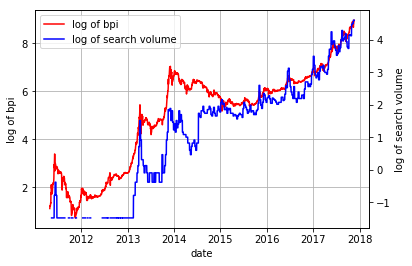

In [5]:
#plot data on two different y axis
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(woo.index, woo.bpi_log, label = 'log of bpi', color ='r')
ax2 = ax.twinx()
lns2 = ax2.plot(woo.index, woo.search_volume_log, label = 'log of search volume',
                color = 'b')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel('log of bpi')
ax2.set_ylabel('log of search volume')

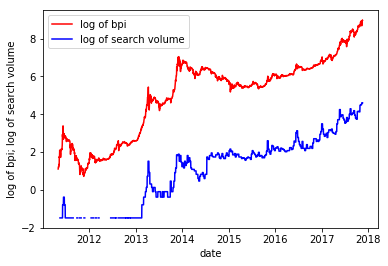

In [6]:
#plot data on same y axis
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)

ax.plot(woo.index, woo.bpi_log, label = 'log of bpi', color ='r')
ax.plot(woo.index, woo.search_volume_log, label = 'log of search volume', color ='b')

ax.set_xlabel("date")
ax.set_ylabel('log of bpi; log of search volume')
ax.legend(('log of bpi','log of search volume'), loc=2)

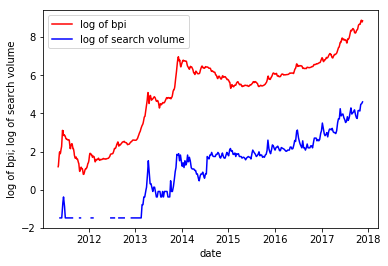

In [7]:
#plot data on same y axis but this time with smoothing effect via rolling window
#in order to remove 'noise' and create a plot that is easier to read
woo_mean = woo.rolling(window=7,center=False).mean()

#plot data
fig = matplotlib.pyplot.figure()

ax = fig.add_subplot(111)

ax.plot(woo_mean.index, woo_mean.bpi_log, label = 'log of bpi', color ='r')
ax.plot(woo_mean.index, woo_mean.search_volume_log,
        label = 'log of search volume', color ='b')

ax.set_xlabel("date")
ax.set_ylabel('log of bpi; log of search volume')

ax.legend(('log of bpi','log of search volume'), loc=2)